# Descriptive Statistics In Python

- This lab is an introduction to Descriptive Statistic <b>using the Pandas library of Python</b>
- Pandas is the most known and extended <b>Python Data Analysis Library</b>
- We will learn the basic syntax of the Pandas library
- We will learn how to perform descriptive statistics to a dataset with Pandas

## Definition of descriptive statistics

From https://en.wikipedia.org/wiki/Descriptive_statistics

Descriptive statistics is the process of using and analysing summary statistics that quantitatively describe or summarize features from a collection of information.

Descriptive statistics is distinguished from inferential statistics (or inductive statistics) by its aim to summarize a sample, rather than use the data to learn about the population that the sample of data is thought to represent.
This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory.

Descriptive statistics provide simple summaries about the sample and about the observations that have been made. Such summaries may be either quantitative, i.e. summary statistics, or visual, i.e. simple-to-understand graphs. These summaries may either form the basis of the initial description of the data as part of a more extensive statistical analysis, or they may be sufficient in and of themselves for a particular investigation.

For example, the shooting percentage in basketball is a descriptive statistic that summarizes the performance of a player or a team. This number is the number of shots made divided by the number of shots taken. For example, a player who shoots 33% is making approximately one shot in every three. The percentage summarizes or describes multiple discrete events. Consider also the grade point average. This single number describes the general performance of a student across the range of their course experiences.

The use of descriptive and summary statistics has an extensive history and, indeed, the simple tabulation of populations and of economic data was the first way the topic of statistics appeared. More recently, a collection of summarisation techniques has been formulated under the heading of exploratory data analysis: an example of such a technique is the box plot.

In the business world, descriptive statistics provides a useful summary of many types of data. For example, investors and brokers may use a historical account of return behaviour by performing empirical and analytical analyses on their investments in order to make better investing decisions in the future. 


## Preliminary videos

- Descriptive statistics in Pandas 
  * https://www.coursera.org/lecture/probability-theory-statistics/descriptive-statistics-in-pandas-M9Soh
- Basic visualization of statistical data in Python
  * https://www.coursera.org/lecture/probability-theory-statistics/basic-visualizations-of-statistical-data-in-python-vMuZw
- (Optional) Converting columns in dataframes
  * https://www.coursera.org/lecture/probability-theory-statistics/converting-columns-in-dataframes-nKsuO

## Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

## Data preparation

In [2]:
# Read the input file
# Data extracted from DGT (Direccion General de Trafico) statistics and indicators webpage
# https://www.dgt.es/es/seguridad-vial/estadisticas-e-indicadores/matriculaciones-definitivas/tablas-estadisticas/
df_cars_brand = pd.read_csv('data/matriculacions_turismes_2020.txt',sep='\t',encoding='latin-1')

In [3]:
# Dataset with brands on columns
# Print the first five columns
df_cars_brand.head(5)

,PROVINCIAS,A_BRUNS_LINDER,A.M.C.,AC_CARS,ACURA,ADRIA,ALFA_ROMEO,ALLIED_VEHICLES_LTD,ALPINA,ALPINE,...,VOLKNER,VOLKSWAGEN,VOLKSWAGEN_AG,VOLKSWAGEN_V_W,VOLVO,VW-PORSCHE,WESTFIELD,WIESMANN,WILLYS_OVERLAND,WILLYS_VIASA
0,Araba/Álava,0,0,0,0,0,10,0,0,0,...,0,289,0,18,157,0,0,0,0,0
1,Albacete,0,0,0,0,0,142,0,0,0,...,0,442,0,9,98,0,0,0,0,0
2,Alicante/Alacant,0,0,0,1,1,58,0,0,0,...,0,2439,0,9,298,0,0,0,0,0
3,Almería,0,0,0,0,0,6,0,0,0,...,1,733,2,35,150,0,0,0,0,0
4,Ávila,0,0,0,0,0,24,0,0,0,...,0,10,0,1,77,0,0,0,0,0


In [4]:
prov = df_cars_brand['PROVINCIAS']

In [5]:
# Convert to a dataframe in which Provinces are on columns
df_cars_prov = df_cars_brand.drop(columns=['PROVINCIAS']).transpose()

In [6]:
df_cars_prov['MARCA'] = df_cars_prov.index

In [7]:
df_cars_prov.columns = list(prov) + ['MARCA']

In [8]:
df_cars_prov.reset_index(inplace=True, drop=True)

In [9]:
# Dataset with Provinces on columns
df_cars_prov

,Araba/Álava,Albacete,Alicante/Alacant,Almería,Ávila,Badajoz,Balears (Illes),Barcelona,Burgos,Cáceres,...,Teruel,Toledo,Valencia/València,Valladolid,Bizkaia,Zamora,Zaragoza,Ceuta,Melilla,MARCA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A_BRUNS_LINDER
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A.M.C.
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AC_CARS
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ACURA
4,0,0,1,0,0,0,0,7,0,0,...,0,0,1,0,0,0,0,0,0,ADRIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,VW-PORSCHE
197,0,0,0,0,0,0,0,2,0,0,...,0,0,1,0,1,0,0,0,0,WESTFIELD
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,WIESMANN
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WILLYS_OVERLAND


In [10]:
# Dataset with totals by province
df_cars_prov_total = pd.DataFrame({'PROVINCIA':df_cars_brand['PROVINCIAS'].reset_index()['PROVINCIAS'],
                                   'TOTAL':df_cars_prov.drop(columns=['MARCA']).sum(axis=0).reset_index()[0]})

In [11]:
df_cars_prov_total

,PROVINCIA,TOTAL
0,Araba/Álava,6546
1,Albacete,6272
2,Alicante/Alacant,42558
3,Almería,7434
4,Ávila,1084
5,Badajoz,8884
6,Balears (Illes),21022
7,Barcelona,108794
8,Burgos,5307
9,Cáceres,2801


In [12]:
# Dataset with totals by brand
df_cars_brand_total = pd.DataFrame({'MARCA':df_cars_prov['MARCA'].reset_index()['MARCA'],
                                   'TOTAL':df_cars_brand.drop(columns=['PROVINCIAS']).sum(axis=0).reset_index()[0]})

In [13]:
df_cars_brand_total

,MARCA,TOTAL
0,A_BRUNS_LINDER,1
1,A.M.C.,1
2,AC_CARS,1
3,ACURA,7
4,ADRIA,10
...,...,...
196,VW-PORSCHE,1
197,WESTFIELD,5
198,WIESMANN,1
199,WILLYS_OVERLAND,1


In [14]:
# Plot most sold brands
# Sort dataframe
top_ten_brands = df_cars_brand_total.sort_values(by='TOTAL', ascending=False).reset_index(drop=True)[0:10]
top_ten_brands

,MARCA,TOTAL
0,PEUGEOT,81169
1,VOLKSWAGEN,78207
2,SEAT,69870
3,RENAULT,59717
4,CITROEN,59621
5,TOYOTA,58630
6,MERCEDES-BENZ,53045
7,KIA,48018
8,AUDI,46661
9,HYUNDAI,45818


<AxesSubplot:xlabel='MARCA'>

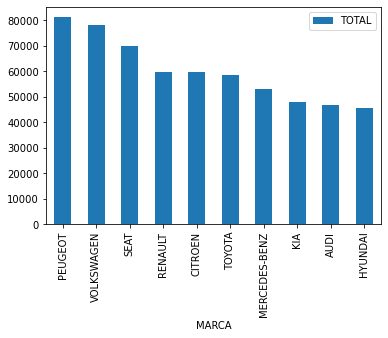

In [15]:
# Plot values
top_ten_brands.plot('MARCA','TOTAL',kind='bar')

<AxesSubplot:>

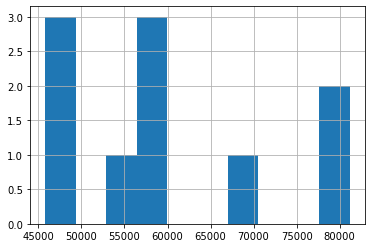

In [16]:
# Plot histogram
top_ten_brands['TOTAL'].hist()

<AxesSubplot:>

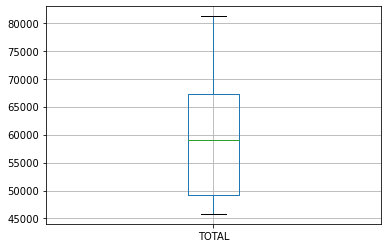

In [48]:
# Boxplot
top_ten_brands.boxplot(column=['TOTAL'])

## Data analysis

### Totals

In [17]:
# Total cars registered by province
total_cars_prov = df_cars_prov.drop(columns=['MARCA']).sum(axis=0).sort_values(ascending=False)
total_cars_prov

Madrid                    307495
Barcelona                 108794
Alicante/Alacant           42558
Valencia/València          39078
Toledo                     29447
Málaga                     25837
Sevilla                    23952
Murcia                     23530
Balears (Illes)            21022
Bizkaia                    17910
Palmas (Las)               17841
Coruña (A)                 15763
Cádiz                      14743
Zaragoza                   13884
Santa Cruz de Tenerife     13651
Asturias                   13066
Tarragona                  12741
Córdoba                    12353
Girona                     12284
Gipuzkoa                   10975
Cantabria                  10916
Granada                    10481
Pontevedra                  9725
Castellón/Castelló          9567
Navarra                     9432
Badajoz                     8884
Jaén                        7660
Almería                     7434
Salamanca                   7010
Lleida                      6742
Araba/Álav

<AxesSubplot:>

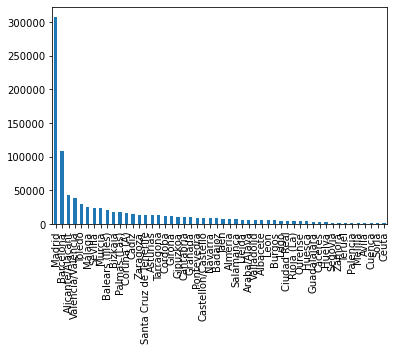

In [18]:
# Plot values
total_cars_prov.plot(kind='bar')

<AxesSubplot:>

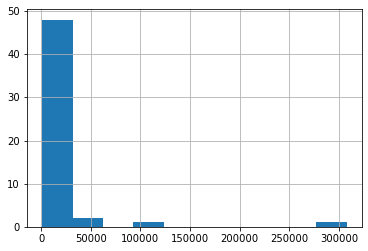

In [19]:
# Plot histogram
total_cars_prov.hist()

In [20]:
# Total cars registered by brand
df_cars_brand.drop(columns=['PROVINCIAS']).sum(axis=0).sort_values(ascending=False)

PEUGEOT           81169
VOLKSWAGEN        78207
SEAT              69870
RENAULT           59717
CITROEN           59621
                  ...  
MK                    1
DREAMER               1
MIMSA                 1
DUTTON                1
A_BRUNS_LINDER        1
Length: 201, dtype: int64

In [21]:
# Total cars registered
df_cars_prov.drop(columns=['MARCA']).sum(axis=0).sort_values(ascending=False).sum()

939096

### Province statistics

In [22]:
# COUNT
count = df_cars_prov_total['TOTAL'].count()
count

52

In [23]:
# MEAN
mean = df_cars_prov_total['TOTAL'].mean()
mean

18059.53846153846

In [24]:
# MEDIAN
med = df_cars_prov_total['TOTAL'].median()
med

8272.0

In [25]:
# SAMPLE VARIANCE
# sx = sum((xi-xm)^2/(n-1))
var = sum((df_cars_prov_total['TOTAL'] - df_cars_prov_total['TOTAL'].mean())**2)/(df_cars_prov_total['TOTAL'].count()-1)
var

1945893349.625943

In [26]:
# STDEV
std = np.sqrt(var)
std

44112.281165520595

In [27]:
# Use the build-in function
df_cars_prov_total['TOTAL'].describe()

count        52.000000
mean      18059.538462
std       44112.281166
min        1014.000000
25%        4411.250000
50%        8272.000000
75%       14098.750000
max      307495.000000
Name: TOTAL, dtype: float64

In [28]:
df_cars_prov_total.sort_values(by=['TOTAL'], ascending=False)

,PROVINCIA,TOTAL
27,Madrid,307495
7,Barcelona,108794
2,Alicante/Alacant,42558
45,Valencia/València,39078
44,Toledo,29447
28,Málaga,25837
40,Sevilla,23952
29,Murcia,23530
6,Balears (Illes),21022
47,Bizkaia,17910


### Brand statistics

In [29]:
# COUNT
count = df_cars_brand_total['TOTAL'].count()
count

201

In [30]:
# MEAN
mean = df_cars_brand_total['TOTAL'].mean()
mean

4672.119402985075

In [31]:
# MEDIAN
med = df_cars_brand_total['TOTAL'].median()
med

3.0

In [32]:
# SAMPLE VARIANCE
# sx = sum((xi-xm)^2/(n-1))
var = sum((df_cars_brand_total['TOTAL'] - df_cars_brand_total['TOTAL'].mean())**2)/(df_cars_brand_total['TOTAL'].count()-1)
var

213687481.5256718

In [33]:
# STDEV
std = np.sqrt(var)
std

14618.053274142621

In [34]:
# Use the build-in function
df_cars_brand_total['TOTAL'].describe()

count      201.000000
mean      4672.119403
std      14618.053274
min          1.000000
25%          1.000000
50%          3.000000
75%         86.000000
max      81169.000000
Name: TOTAL, dtype: float64

In [35]:
df_cars_brand_total.sort_values(by=['TOTAL'], ascending=False)

,MARCA,TOTAL
147,PEUGEOT,81169
192,VOLKSWAGEN,78207
165,SEAT,69870
156,RENAULT,59717
47,CITROEN,59621
...,...,...
137,MK,1
66,DREAMER,1
134,MIMSA,1
69,DUTTON,1


### Filters

In [36]:
# Cars sold in Barcelona province
df_cars_bcn = df_cars_prov[['MARCA','Barcelona']]
df_cars_bcn

,MARCA,Barcelona
0,A_BRUNS_LINDER,0
1,A.M.C.,0
2,AC_CARS,0
3,ACURA,0
4,ADRIA,7
...,...,...
196,VW-PORSCHE,0
197,WESTFIELD,2
198,WIESMANN,0
199,WILLYS_OVERLAND,0


### Exercises

- Descriptive statistics for Barcelona province
  * Total sales
  * Mean by brand
  * Std by brand
  * Quantiles 0.25, 0.5, and 0.75 of sales by brand
- Top brand sold in Barcelona province
- Top ten brands sold in Barcelona province
- Plot top ten brands sold in Barcelona province
- Histogram of sales of all brands in Barcelona province
- Boxplot of sales of all brands in Barcelona province
- Repeat the same for another province of your choice. Are results similar?